Philippe Joly 2026-02-07

# 1 Hz Test Data Overview

This notebook is just to get a view of what the 1Hz test data taken from the lab looks like. And to spot upsampling artifacts.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
from os import path
sys.path.append(path.expanduser('~'))

In [14]:
# fns = {
#     65536:'/scratch/philj0ly/vis_plasma2/all_ant_4bit_1721361671_2048_65536_5_0_119.npz',
#     32768: '/scratch/philj0ly/vis_plasma2/all_ant_4bit_1721361671_2048_32768_10_0_119.npz',
#     16384: '/scratch/philj0ly/vis_plasma2/all_ant_4bit_1721361671_2048_16384_20_0_119.npz'
# }

fns = {
    65536:'/scratch/philj0ly/clock_tests/all_ant_4bit_1445541650_2048_65536_5_0_120.npz',
}

t0 = 1445541650
df_record = 125e6/2048 # (Hz) frequency range / # of channels
t_tot = 300 #s

data = []
freqs = []
times = []
for i in fns:
    with np.load(fns[i]) as f:
        dat = f['data']
        spectrum = np.ma.MaskedArray(data=dat, mask=f['mask'])
        N = spectrum.shape[-1]
        data.append(np.abs(spectrum[0,0]+spectrum[1,1]))
    
        freqs.append(f['chans']*df_record/i)
        times.append((0.5 + np.arange(N))*t_tot/N) 

##  Frequency Visualisation

In [15]:
avg_data = []
for i in range(len(fns)):
    avg_data.append(np.ma.median(data[i], axis=1)) 

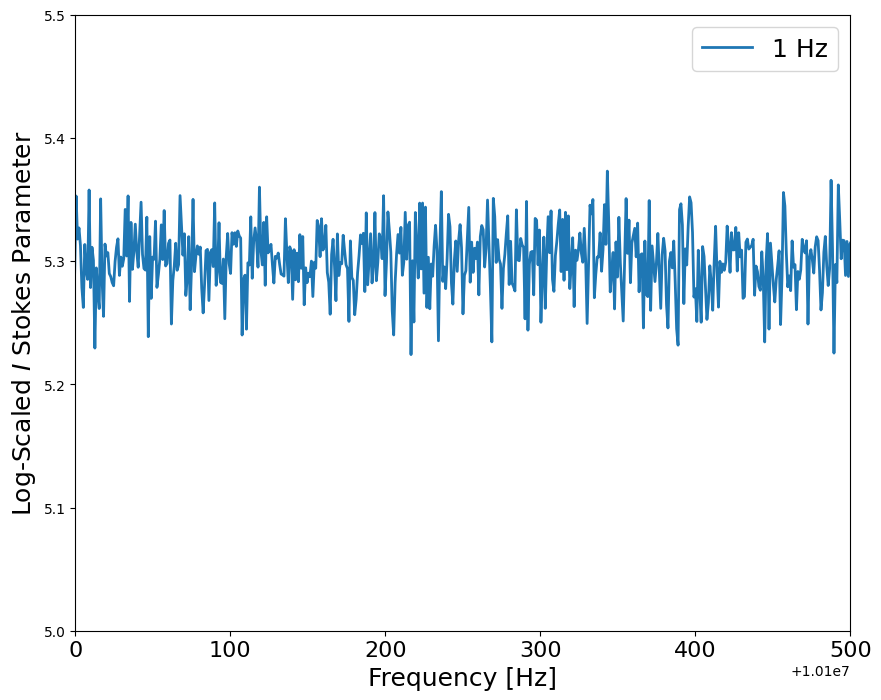

In [56]:
plt.figure(figsize=(10,8))

res = ['1 Hz']
offset = [0, 0, 0, 0, -1.5, 0, 1.5, 3]

for i, osamp in enumerate(list(fns.keys())):
    if i in [1, 2, 3]:
        continue
    plt.plot(freqs[i], np.log10(avg_data[i])+offset[i], linewidth=2, label=res[i])


# plt.ylim(0,10)
dx = 5e2
x0 = 10.1e6
plt.xlim(x0,x0+dx)
plt.ylim(5,5.5)
# plt.yticks([])
plt.xticks(fontsize=16)
plt.xlabel('Frequency [Hz]', fontsize=18)   
plt.ylabel('Log-Scaled $I$ Stokes Parameter', fontsize=18)
plt.legend(loc="upper right", fontsize=18)

plt.show()

## Time Visualisation

[(3276800, 3342336), (1638400, 1671168), (819200, 835584)]


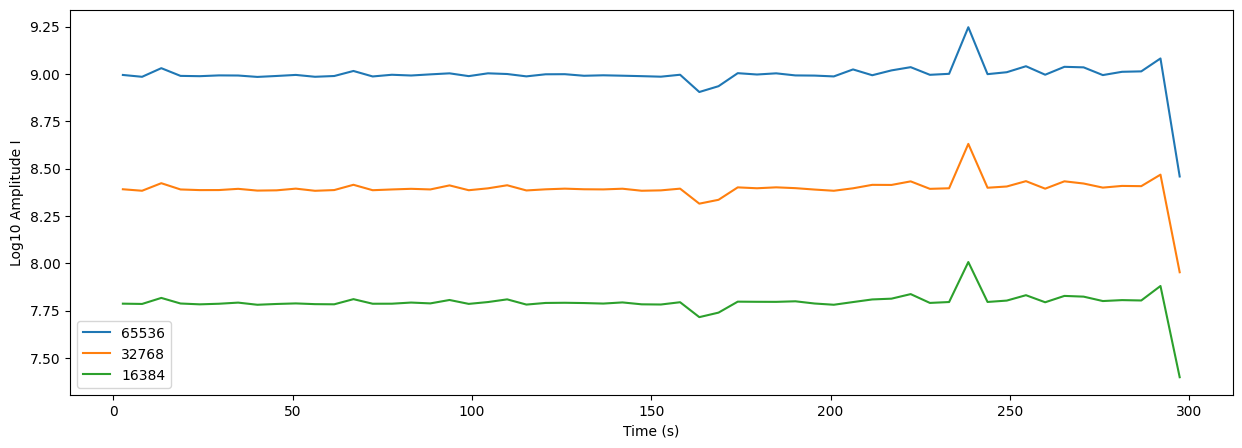

In [39]:
f = 100000

freq_bin = 50
f_ranges = [(osamp*freq_bin, osamp*(freq_bin+1)) for osamp in fns ]
print(f_ranges)

plt.figure(figsize=(15,5))   
for i, osamp in enumerate(list(fns.keys())):
    plt.plot(times[i], np.log10(np.sum(data[i][f_ranges[i][0]:f_ranges[i][1]], axis=0)), label=osamp)

plt.xlabel('Time (s)')   
plt.ylabel('Log10 Amplitude I')
plt.legend()

plt.show()